In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pulp import *
from scipy.optimize import minimize

No. of nodes = 10
No. of edges = 20


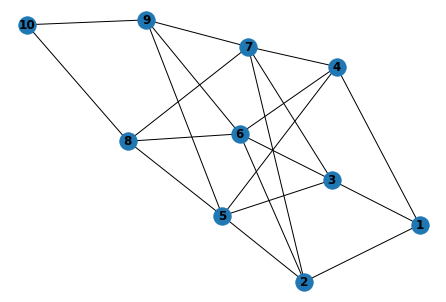

[1, 2, 5, 8, 10]
{10: [10], 8: [10, 8], 9: [10, 9], 5: [10, 8, 5], 6: [10, 8, 6], 7: [10, 8, 7], 2: [10, 8, 5, 2], 3: [10, 8, 5, 3], 4: [10, 8, 5, 4], 1: [10, 8, 5, 2, 1]}


In [152]:
network = nx.Graph()
network.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
network.add_edges_from([(1, 2, {'distance':550}), (1, 3, {'distance':900}), (1, 4, {'distance':770}),
                      (2, 5, {'distance':680}), (2, 6, {'distance':790}), (2, 7, {'distance':1050}),
                      (3, 5, {'distance':580}), (3, 6, {'distance':760}), (3, 7, {'distance':660}),
                      (4, 5, {'distance':510}), (4, 6, {'distance':700}), (4, 7, {'distance':830}),
                      (5, 8, {'distance':610}), (5, 9, {'distance':790}), (6, 8, {'distance':540}),
                      (6, 9, {'distance':940}), (7, 8, {'distance':790}), (7, 9, {'distance':270}),
                      (8, 10, {'distance':1030}), (9, 10, {'distance':1390})])
print(f"No. of nodes = {network.number_of_nodes()}")
print(f"No. of edges = {network.number_of_edges()}")
nx.draw(network, with_labels=True, font_weight='bold')
plt.show()
print(nx.shortest_path(network, 1, 10, weight='distance')) # (G, starting_node, ending_node, weight)
print(nx.single_source_shortest_path(network, 10, 4)) # (G, node, degree)

In [14]:
G = nx.Graph()
G.add_node(1)
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)
G.add_edges_from([(1, 2), (2, 3)])
G.add_edges_from(H.edges)
G.degree
G.clear()

In [17]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node('spam')
G.add_nodes_from('spam') # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
G.number_of_nodes() # 8
G.number_of_edges() # 3

3

In [55]:
time = 10
M = 1000000
setup_cost, variable_cost, holding_cost = 100, 1, 1
model = LpProblem('Lot_Sizing', LpMinimize)
z = {i: LpVariable(f"z{i}", cat='Binary') for i in range(1, time+1)}
i = {i: LpVariable(f"i{i}", cat='Integer', lowBound=0) for i in range(time+1)}
y = {i: LpVariable(f"y{i}", cat='Integer', lowBound=0) for i in range(1, time+1)}
model += sum([setup_cost*z[t] + holding_cost*i[t] for t in range(1, time+1)]), 'Objective'

model += i[0] == 0
model += i[1] == i[0] + y[1] - 20
model += i[2] == i[1] + y[2] - 50
model += i[3] == i[2] + y[3] - 10
model += i[4] == i[3] + y[4] - 50
model += i[5] == i[4] + y[5] - 50
model += i[6] == i[5] + y[6] - 10
model += i[7] == i[6] + y[7] - 20
model += i[8] == i[7] + y[8] - 40
model += i[9] == i[8] + y[9] - 20 
model += i[10] <= i[9] + y[10] - 30
model += y[1] <= M * z[1]
model += y[2] <= M * z[2]
model += y[3] <= M * z[3]
model += y[4] <= M * z[4]
model += y[5] <= M * z[5]
model += y[6] <= M * z[6]
model += y[7] <= M * z[7]
model += y[8] <= M * z[8]
model += y[9] <= M * z[9]
model += y[10] <= M * z[10]
model += lpSum(y) + i[0] == 300

model.solve()

print('Status', LpStatus[model.status])
print('Objective', model.objective.value())
for v in model.variables():
    print(v, '=', v.varValue)


Status Optimal
Objective 580.0
i0 = 0.0
i1 = 60.0
i10 = 0.0
i2 = 10.0
i3 = 0.0
i4 = 80.0
i5 = 30.0
i6 = 20.0
i7 = 0.0
i8 = 50.0
i9 = 30.0
y1 = 80.0
y10 = 0.0
y2 = 0.0
y3 = 0.0
y4 = 130.0
y5 = 0.0
y6 = 0.0
y7 = 0.0
y8 = 90.0
y9 = 0.0
z1 = 1.0
z10 = 0.0
z2 = 0.0
z3 = 0.0
z4 = 1.0
z5 = 0.0
z6 = 0.0
z7 = 0.0
z8 = 1.0
z9 = 0.0


In [62]:
time = 4
P, C = 5, 4
M = 1000000
setup_cost, variable_cost, holding_cost = 3, 1, 0.5
model = LpProblem('DP-Inventory_Problem', LpMinimize)
z = {i: LpVariable(f"z{i}", cat='Binary') for i in range(1, time+1)}
y = {i: LpVariable(f"y{i}", cat='Integer', lowBound=0, upBound=P) for i in range(1, time+1)}
x = {i: LpVariable(f"x{i}", cat='Integer', lowBound=0, upBound=C) for i in range(time+1)}
model += sum([setup_cost*z[t] + variable_cost*y[t] + holding_cost*x[t] for t in range(1, time+1)]), 'Objective'

model += x[0] == 0
model += x[1] == x[0] + y[1] - 1
model += x[2] == x[1] + y[2] - 3
model += x[3] == x[2] + y[3] - 2
model += x[4] == x[3] + y[4] - 4
model += y[1] <= M * z[1]
model += y[2] <= M * z[2]
model += y[3] <= M * z[3]
model += y[4] <= M * z[4]
model += lpSum(y) + x[0] == 10

model.solve()

print('Status', LpStatus[model.status])
print('Objective', model.objective.value())
for v in model.variables():
    print(v, '=', v.varValue)


Status Optimal
Objective 20.0
x0 = 0.0
x1 = 0.0
x2 = 2.0
x3 = 0.0
x4 = 0.0
y1 = 1.0
y2 = 5.0
y3 = 0.0
y4 = 4.0
z1 = 1.0
z2 = 1.0
z3 = 0.0
z4 = 1.0


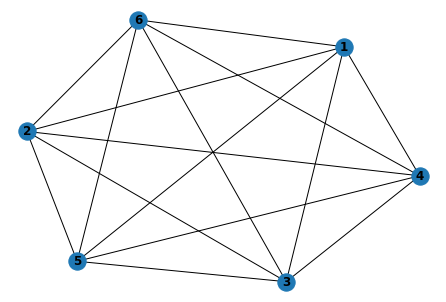

[1, 2, 4, 6]
Net cost = 31


In [79]:
# c_ij = purchase_cost(i-1) + main_cost(i to j)  - sv(j-1)
P = 12
m = {1:2, 2:4, 3:5, 4:9, 5:12}
sv = {1:7, 2:6, 3:2, 4:1, 5:0}
time = 5


def cost_arc(init, maint, slv, time, N=0):
    c_arc, base_c_arc = {}, []
    maint_arr = list(maint.values())
    slv_arr = list(slv.values())
    for i in range(1, time+2):
        for j in range(time+2):
            if j > i:
                if i == 1:
                    if j <= time + 2 - N:
                        c_arc[int(f"{i}{j}")] = init + sum(maint_arr[:j-1]) - slv_arr[j-2]
                        base_c_arc.append(init + sum(maint_arr[:j-1]) - slv_arr[j-2])
                    else:
                        diff = j - (time + 2 - N)
                        c_arc[int(f"{i}{j}")] = \
                        ((j-1)//(time+1-N))*c_arc[int(f"1{time+2-N}")] + base_c_arc[((j-1)%(time+1-N))-1]
                        base_c_arc.append(c_arc[int(f"{i}{j}")])
                else:
                    diff = j - i
                    c_arc[int(f"{i}{j}")] = base_c_arc[diff-1]
    return c_arc


c = cost_arc(init=P, maint=m, slv=sv, time=time)

network = nx.Graph()
network.add_nodes_from([1, 2, 3, 4, 5, 6])
network.add_edges_from([(1, 2, {'cost':c[12]}), (1, 3, {'cost':c[13]}), (1, 4, {'cost':c[14]}),
                        (1, 5, {'cost':c[15]}), (1, 6, {'cost':c[16]}), (2, 3, {'cost':c[23]}),
                        (2, 4, {'cost':c[24]}), (2, 5, {'cost':c[25]}), (2, 6, {'cost':c[26]}),
                        (3, 4, {'cost':c[34]}), (3, 5, {'cost':c[35]}), (3, 6, {'cost':c[36]}),
                        (4, 5, {'cost':c[45]}), (4, 6, {'cost':c[46]}), (5, 6, {'cost':c[56]})])

nx.draw(network, with_labels=True, font_weight='bold')
plt.show()
shortest_path = nx.shortest_path(network, 1, 6, weight='cost')
cost = []
for i in range(len(shortest_path)-1):
    cost.append(c[int(f"{shortest_path[i]}{shortest_path[i+1]}")])
print(shortest_path)
print('Net cost', '=', sum(cost))


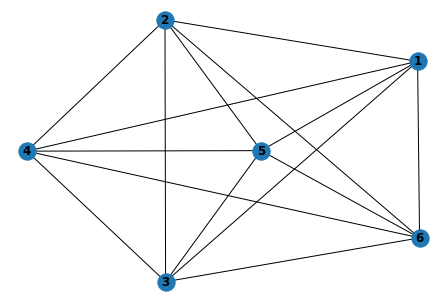

[1, 2, 6]
Net cost = 1280


In [28]:
# c_ij = purchase_cost(i-1) + main_cost(i to j)  - sv(j-1)
P = 1000
m = {1:60, 2:80, 3:120}
sv = {1:800, 2:600, 3:500}


def cost_arc(init, maint, slv, time, N=0):
    c_arc, base_c_arc = {}, []
    maint_arr = list(maint.values())
    slv_arr = list(slv.values())
    for i in range(1, time+2):
        for j in range(time+2):
            if j > i:
                if i == 1:
                    if j <= time + 2 - N:
                        c_arc[int(f"{i}{j}")] = init + sum(maint_arr[:j-1]) - slv_arr[j-2]
                        base_c_arc.append(init + sum(maint_arr[:j-1]) - slv_arr[j-2])
                    else:
                        diff = j - (time + 2 - N)
                        c_arc[int(f"{i}{j}")] = \
                        ((j-1)//(time+1-N))*c_arc[int(f"1{time+2-N}")] + base_c_arc[((j-1)%(time+1-N))-1]
                        base_c_arc.append(c_arc[int(f"{i}{j}")])
                else:
                    diff = j - i
                    c_arc[int(f"{i}{j}")] = base_c_arc[diff-1]
    return c_arc


c = cost_arc(init=P, maint=m, slv=sv, time=5, N=3)
network = nx.Graph()
network.add_nodes_from([1, 2, 3, 4, 5, 6])
network.add_edges_from([(1, 2, {'cost':c[12]}), (1, 3, {'cost':c[13]}), (1, 4, {'cost':c[14]}),
                        (1, 5, {'cost':c[15]}), (1, 6, {'cost':c[16]}), (2, 3, {'cost':c[23]}),
                        (2, 4, {'cost':c[24]}), (2, 5, {'cost':c[25]}), (2, 6, {'cost':c[26]}),
                        (3, 4, {'cost':c[34]}), (3, 5, {'cost':c[35]}), (3, 6, {'cost':c[36]}),
                        (4, 5, {'cost':c[45]}), (4, 6, {'cost':c[46]}), (5, 6, {'cost':c[56]})])

nx.draw(network, with_labels=True, font_weight='bold')
plt.show()
shortest_path = nx.shortest_path(network, 1, 6, weight='cost')
cost = []
for i in range(len(shortest_path)-1):
    cost.append(c[int(f"{shortest_path[i]}{shortest_path[i+1]}")])
print(shortest_path)
print('Net cost', '=', sum(cost))


In [69]:
model = LpProblem('Resource_allocation', LpMaximize)
d = {i: LpVariable(f"d{i}", cat='Integer', lowBound=0, upBound=6) for i in range(1, 4)}
z = {i: LpVariable(f"z{i}", cat='Binary') for i in range(1, 4)}
r = {i: LpVariable(f"r{i}", cat='Integer', lowBound=0) for i in range(1, 4)}
model += lpSum(r), 'Objective'

M = 1000
model += lpSum(d) <= 6
model += d[1] <= M * z[1]
model += d[2] <= M * z[2]
model += d[3] <= M * z[3]

model += r[1] <= 7*d[1] + 2
model += r[1] <= M * d[1] # use d[i] as a binary variable

model += r[2] <= 3*d[2] + 7
model += r[2] <= M * d[2] 

model += r[3] <= 4*d[3] + 5
model += r[3] <= M * d[3] 

model.solve()

print('Status', LpStatus[model.status])
print('Objective', model.objective.value())
for v in model.variables():
    print(v, '=', v.varValue)
    

Status Optimal
Objective 49.0
d1 = 4.0
d2 = 1.0
d3 = 1.0
r1 = 30.0
r2 = 10.0
r3 = 9.0
z1 = 1.0
z2 = 1.0
z3 = 1.0


In [70]:
res = 6
min_args = {}
max_val = 0
for i in range(res+1):
    for j in range(res-i+1):
        for k in range(res-i-j+1):
            r = {1:7*i+2, 2:3*j+7, 3:4*k+5}
            if i == 0:
                r[1] = 0
            if j == 0:
                r[2] = 0
            if k == 0:
                r[3] = 0
            if sum(r.values()) > max_val:
                max_val = sum(r.values())
                min_args[1] = i
                min_args[2] = j
                min_args[3] = k

print(min_args)

{1: 4, 2: 1, 3: 1}


In [75]:
model = LpProblem('Knapsack_Problem', LpMaximize)
x = {i: LpVariable(f"x{i}", cat='Integer', lowBound=0) for i in (1, 2, 3)}
model += 11*x[1] + 7*x[2] + 12*x[3], 'Objective'

model += 4*x[1] + 3*x[2] + 5*x[3] <= 10

model.solve()

print('Status', LpStatus[model.status])
print('Obejctive', model.objective.value())
for v in model.variables():
    print(v, '=', v.varValue)

Status Optimal
Obejctive 25.0
x1 = 1.0
x2 = 2.0
x3 = 0.0


Number of nodes: 10
Number of edges: 16


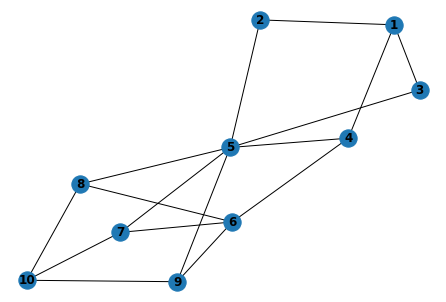

[1, 4, 6, 8, 10]
Altitude = 27
Maximum altitude encountered = 8


In [3]:
network = nx.Graph()
network.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
network.add_edges_from([(1, 2, {'altitude':10}), (1, 3, {'altitude':7}), (1, 4, {'altitude':6}),
                        (2, 5, {'altitude':9}), (3, 5, {'altitude':7}), (4, 5, {'altitude':11}),
                        (4, 6, {'altitude':7}), (5, 7, {'altitude':8}), (5, 8, {'altitude':7}),
                        (5, 9, {'altitude':10}), (6, 7, {'altitude':8}), (6, 8, {'altitude':6}),
                        (6, 9, {'altitude':7}), (7, 10, {'altitude':13}), (8, 10, {'altitude':8}),
                        (9, 10, {'altitude':9})])

print('Number of nodes:', network.number_of_nodes())
print('Number of edges:', network.number_of_edges())
nx.draw(network, with_labels=True, font_weight='bold')
plt.show()
shortest_path = nx.shortest_path(network, 1, 10, weight='altitude')
cost = []
for i in range(len(shortest_path)-1):
    cost.append(network.edges[shortest_path[i], shortest_path[i+1]]['altitude'])
print(shortest_path)
print('Altitude =', sum(cost))
print('Maximum altitude encountered =', max(cost))

In [5]:
A = np.array([[0.6, 0.5, 0.3],
              [0.8, 0.7, 0.55],
              [0.85, 0.85, 0.7]])
z = {}

max_value = 0
# np.prod()



0.6
0.5
0.3


In [57]:
def f(t, s):
    A = np.array([[0.6, 0.5, 0.3],
                  [0.8, 0.7, 0.55],
                  [0.85, 0.85, 0.7]])
    

    if t == len(A):
        return A[s, t-1]

    arr = []
    for i in range(s+1):
        arr.append(A[i, t-1] * f(t+1, s-i))
    
    print(arr)
    return max(arr)

f(1, 2)

[0.35, 0.385, 0.255]
[0.275, 0.21]
[0.15]
[0.23099999999999998, 0.22000000000000003, 0.1275]


0.23099999999999998

2

In [34]:
f(2, 2) = [0.35, 0.385, 0.255]
f(2, 1) = [0.275, 0.21]
f(2, 0) = [0.15]
f(1, 2) = [0.231, 0.22, 0.1275]

8

In [120]:
0.6 * 0.7 * 0.55

0.231

In [19]:
def f(t, s):
    A = np.array([[0.6, 0.5, 0.3],
                  [0.8, 0.7, 0.55],
                  [0.85, 0.85, 0.7]])
    max_val = 0

    if t == len(A):
        return A[s, t-1]
    
    arr = []
    for i in range(s+1):
        arr.append(A[i, t-1] * f(t+1, s-i))

    return max(arr)

f(1, 2)

0.23099999999999998

In [12]:
import os, sys, time
import pdb
from pyopt import *

In [13]:
def objfunc(x):
    f = -x[0]*x[1]*x[2]
    g = [0.0]*2
    g[0] = x[0] + 2.*x[1] + 2.*x[2] - 72.0
    g[1] = -x[0] - 2.*x[1] - 2.*x[2]
    fail = 0
    return f,g, fail  

In [58]:
from pyOpt import Optimization
opt_prob = Optimization('Hock and Schittkowski Constrained Problem',objfunc)

opt_prob.addVar('x1','c',lower=0.0,upper=42.0,value=10.0)

opt_prob.addVar('x2','c',lower=0.0,upper=42.0,value=10.0)

opt_prob.addVar('x3','c',lower=0.0,upper=42.0,value=10.0)

opt_prob.addObj('f')

opt_prob.addCon('g1','i')

opt_prob.addCon('g2','i')

print(opt_prob)

SyntaxError: invalid syntax (__init__.py, line 20)

In [59]:
    A = np.array([[0.6, 0.5, 0.3],
                  [0.8, 0.7, 0.55],
                  [0.85, 0.85, 0.7]])


In [109]:
model = LpProblem('Salesperson Allocation', LpMaximize)
z = {}
for sales_rep in range(len(A)):
    for regions in range(1, len(A)+1):
        z[int(f"{sales_rep}{regions}")] = LpVariable(f"{sales_rep}{regions}", cat='Binary')
model = abs((0.6*z[1])-1+z[1]), 'Objective'
        
model += z[21] + z[22] + z[23] <= 1
model += z[11] + z[12] + z[13] <= 2
model += 1 * (z[11] + z[12] + z[13]) + 2 * (z[21] + z[22] + z[23]) <= 2


TypeError: bad operand type for abs(): 'LpAffineExpression'

In [112]:
b = 0
abs((0.6 * b) - 1 + b)


0.22000000000000003

In [107]:
z = {1:None, 2:None, 3:None, 11:None, 12:None, 13:None, 21:None, 22:None, 23:None}
# z = {0:None, 1:None, 2:None, 3:None, 4:None, 5:None, 6:None, 7:None, 8:None}


def objective(z):
    obj = abs((0.6*z[0])-1+z[0]) * abs((0.5*z[1])-1+z[1]) * abs((0.3*z[2])-1+z[2]) * \
          abs((0.8*z[3])-1+z[3]) * abs((0.7*z[4])-1+z[4]) * abs((0.55*z[5])-1+z[5]) * \
          abs((0.85*z[6])-1+z[6]) * abs((0.85*z[7])-1+z[7]) * abs((0.7*z[8])-1+z[8])
    return -obj

def constraint1(z):
    return 1 - z[6] - z[7] - z[8]

def constraint2(z):
    return 2 - z[3] - z[4] - z[5]

def constraint3(z):
    sum_sales_rep = 2
    for i in range(3, 9):
        if i <= 5:
            sum_sales_rep = sum_sales_rep - z[i]
        else:
            sum_sales_rep = sum_sales_rep - 2*z[i]
    return sum_sales_rep

z0 = [1, 0, 0, 0, 1, 1, 0, 0, 0]
b = (0, 1)
bnds = (b, b, b, b, b, b, b, b, b)
con1 = {'type':'ineq', 'fun':constraint1}
con2 = {'type':'ineq', 'fun':constraint2}
con3 = {'type':'ineq', 'fun':constraint3}
cons = [con1, con2, con3]
sol = minimize(objective, z0, constraints=cons, bounds=bnds)
print(sol)



     fun: -0.231
     jac: array([-0.616  ,  0.3465 ,  0.3003 ,  0.4158 , -0.561  , -0.651  ,
        0.42735,  0.42735,  0.3927 ])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([1., 0., 0., 0., 1., 1., 0., 0., 0.])
